In [100]:
import numpy as np 
import pandas as pd
df_yield = pd.read_csv(r"C:\Users\Ushasini\Desktop\b6\Maharastra crop data.csv")
df_yield.shape

(1328, 8)

In [101]:
df_yield.head()

,State_Name,District,Crop,Season,Area,Rainfall,Temperature,Yield
0,Maharashtra,AHMEDNAGAR,Jowar,Rabi,598400,42.3484,24.2430,217000
1,Maharashtra,AHMEDNAGAR,Jowar,Rabi,453200,8.7838,23.1000,227900
2,Maharashtra,AHMEDNAGAR,Jowar,Rabi,498300,39.5078,22.8118,190900
3,Maharashtra,AHMEDNAGAR,Jowar,Rabi,518700,9.2558,23.2746,160800
4,Maharashtra,AHMEDNAGAR,Jowar,Rabi,528900,4.0668,23.5674,175000


In [102]:
df_yield.tail()

,State_Name,District,Crop,Season,Area,Rainfall,Temperature,Yield
1323,Maharashtra,YAVATMAL,Wheat,Rabi,41700,27.4774,24.58152,61400
1324,Maharashtra,YAVATMAL,Wheat,Rabi,34100,23.9894,24.68200,58500
1325,Maharashtra,YAVATMAL,Wheat,Rabi,36100,23.9894,24.78900,64600
1326,Maharashtra,YAVATMAL,Wheat,Rabi,34500,3.5930,24.85400,30700
1327,Maharashtra,YAVATMAL,Wheat,Rabi,29100,17.4454,24.64700,26800


In [103]:
df_yield.describe()

,Area,Rainfall,Temperature,Yield
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,64171.179970,88.197466,24.976301,49192.308735
std,109386.821017,139.435230,1.576876,63837.380980
min,2.000000,0.791600,22.312400,1.000000
25%,6000.000000,13.978800,23.941700,3075.000000
50%,25700.000000,30.825100,24.561000,25400.000000
75%,64475.000000,90.368500,25.962500,69125.000000
max,726300.000000,987.536000,32.000000,406000.000000


In [104]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State_Name   1328 non-null   object 
 1   District     1328 non-null   object 
 2   Crop         1328 non-null   object 
 3   Season       1328 non-null   object 
 4   Area         1328 non-null   int64  
 5   Rainfall     1328 non-null   float64
 6   Temperature  1328 non-null   float64
 7   Yield        1328 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 83.1+ KB


In [105]:
df_yield.isnull().sum()

State_Name     0
District       0
Crop           0
Season         0
Area           0
Rainfall       0
Temperature    0
Yield          0
dtype: int64

In [106]:
df_yield.groupby('Crop').count()

,State_Name,District,Season,Area,Rainfall,Temperature,Yield
Crop,,,,,,,
Bajra,386,386,386,386,386,386,386
Jowar,441,441,441,441,441,441,441
Wheat,501,501,501,501,501,501,501


In [107]:
df_yield['District'].nunique()

30

In [108]:
df_yield.groupby(['District'],sort=True)['Yield'].sum().nlargest(10)

District
AHMEDNAGAR    8257292
PUNE          6153487
SOLAPUR       5622409
NASHIK        5186035
BEED          4912125
AURANGABAD    4375035
SATARA        3315726
OSMANABAD     3009153
JALGAON       2951584
DHULE         2933695
Name: Yield, dtype: int64

In [109]:
df_yield.groupby(['Crop','District'],sort=True)['Yield'].sum().nlargest(10)

Crop   District  
Jowar  SOLAPUR       4408415
       AHMEDNAGAR    3505040
Bajra  NASHIK        3423195
Jowar  PUNE          3310455
Wheat  AHMEDNAGAR    2404011
Jowar  OSMANABAD     2389905
Bajra  AHMEDNAGAR    2348241
Jowar  BEED          2191563
Bajra  DHULE         1962191
       BEED          1906265
Name: Yield, dtype: int64

In [110]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

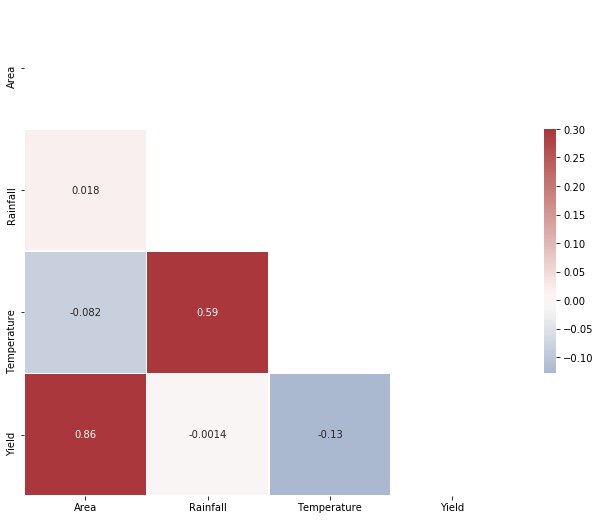

In [111]:
correlation_data=df_yield.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,);


In [112]:
df_yield.head()


,State_Name,District,Crop,Season,Area,Rainfall,Temperature,Yield
0,Maharashtra,AHMEDNAGAR,Jowar,Rabi,598400,42.3484,24.2430,217000
1,Maharashtra,AHMEDNAGAR,Jowar,Rabi,453200,8.7838,23.1000,227900
2,Maharashtra,AHMEDNAGAR,Jowar,Rabi,498300,39.5078,22.8118,190900
3,Maharashtra,AHMEDNAGAR,Jowar,Rabi,518700,9.2558,23.2746,160800
4,Maharashtra,AHMEDNAGAR,Jowar,Rabi,528900,4.0668,23.5674,175000


In [114]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_yield['State_Name'] = le.fit_transform(df_yield['State_Name'])
df_yield['District'] = le.fit_transform(df_yield['District'])
df_yield['Season'] = le.fit_transform(df_yield['Season'])
df_yield['Crop'] = le.fit_transform(df_yield['Crop'])
print(df_yield)

      State_Name  District  Crop  Season    Area  Rainfall  Temperature  \
0              0         0     1       1  598400   42.3484     24.24300   
1              0         0     1       1  453200    8.7838     23.10000   
2              0         0     1       1  498300   39.5078     22.81180   
3              0         0     1       1  518700    9.2558     23.27460   
4              0         0     1       1  528900    4.0668     23.56740   
...          ...       ...   ...     ...     ...       ...          ...   
1323           0        29     2       1   41700   27.4774     24.58152   
1324           0        29     2       1   34100   23.9894     24.68200   
1325           0        29     2       1   36100   23.9894     24.78900   
1326           0        29     2       1   34500    3.5930     24.85400   
1327           0        29     2       1   29100   17.4454     24.64700   

       Yield  
0     217000  
1     227900  
2     190900  
3     160800  
4     175000  
...      

In [115]:
y = df_yield["Yield"]
X = df_yield.drop('Yield',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

In [116]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(X_train,y_train)
    y_pred=fit.predict(X_test) 
    r2=r2_score(y_test,y_pred)
    return([model_name,r2])

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [118]:
model_train=list(map(compare_models,models))

In [165]:
print(*model_train,sep="\n")


['GradientBoostingRegressor', 0.8294531178502802]
['RandomForestRegressor', 0.8188530090302677]
['SVR', -0.10183450463683674]
['DecisionTreeRegressor', 0.7328729097023956]


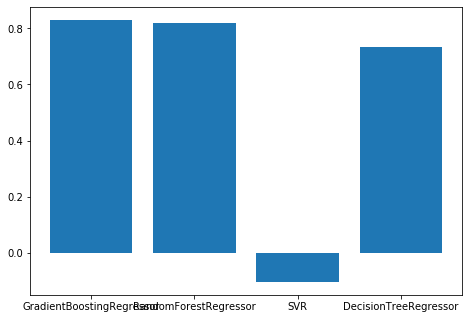

In [167]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['GradientBoostingRegressor', 'RandomForestRegressor', 'SVR', 'DecisionTreeRegressor']
accuracies = [0.8294531178502802,0.8188530090302677,-0.10183450463683674,0.7328729097023956]
ax.bar(algorithms,accuracies)
plt.show()

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = GradientBoostingRegressor()
m1=XGBModel.fit(X_train,y_train)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
print("R2 score:",r2_score(XGBpredictions,y_test))

XGBoost validation MAE =  12513.072310554275
R2 score: 0.7818164018535885


In [168]:
varimp= {'imp':model.feature_importances_,'names':df_yield.columns[df_yield.columns!="Yield"]}

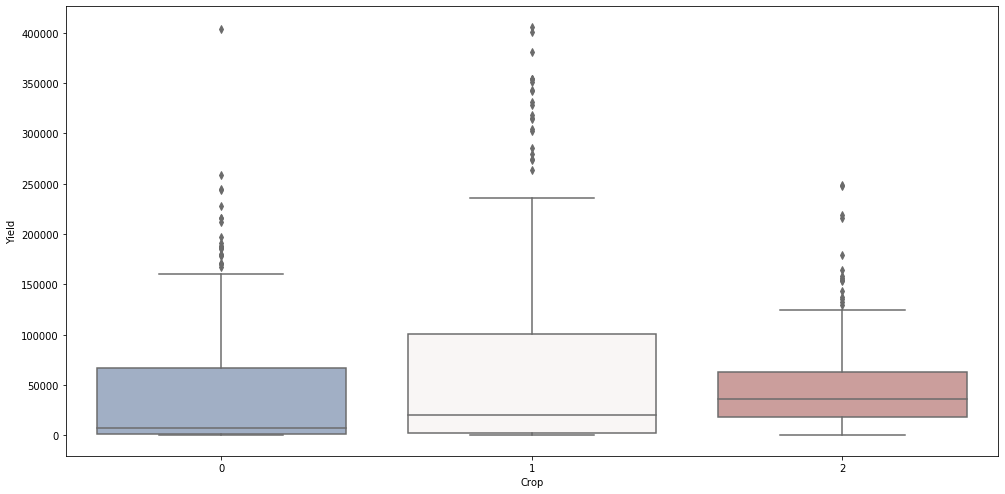

In [169]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Crop",y="Yield",palette="vlag",data=df_yield,ax=ax);

In [170]:
import pickle
filename = 'yield_modelpkgbr__.pkl'
pickle.dump(m1, open(filename, 'wb'))

In [171]:
import joblib
import pickle
clf = pickle.load(open('yield_modelpkgbr__.pkl', 'rb'))

def predict():


        pred_args = [ 0     ,    0  ,   1  ,     1 , 34009 ,  45.3484   ,  19.24300  ]
        mul_reg = open('yield_modelpkgbr__.pkl','rb')
        ml_model = joblib.load(mul_reg)
        model_prediction = ml_model.predict([pred_args])
        return model_prediction



In [172]:
predict()

array([47230.1659021])